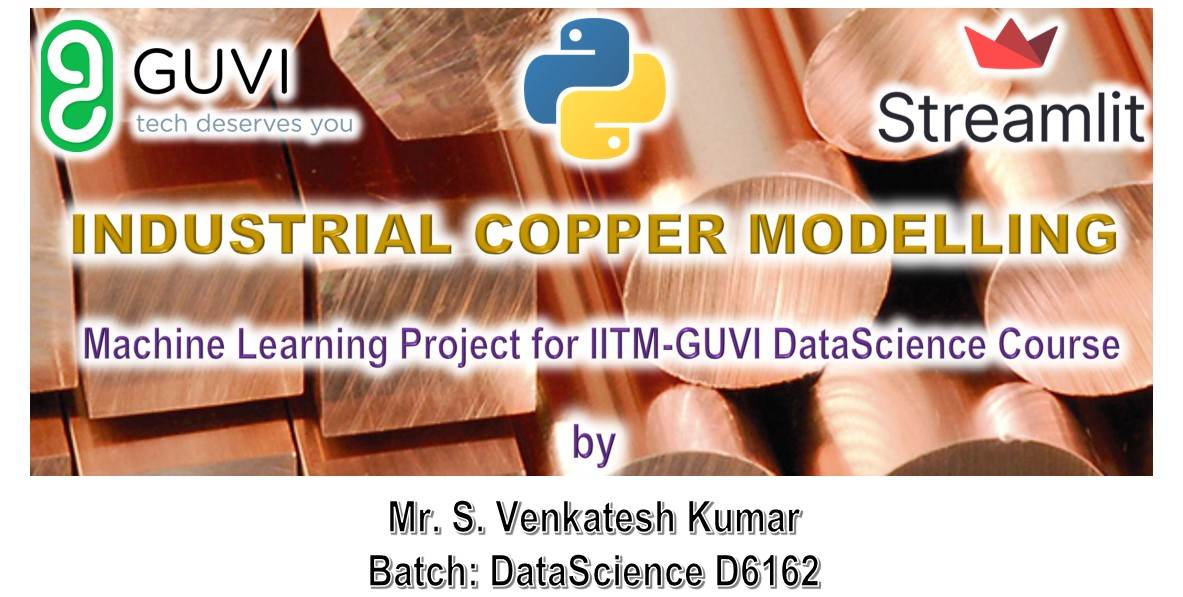

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
cu=pd.read_csv('Copper_Set.csv')

In [3]:
# viewing the data structure
cu.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


## 2. Exploratory Data Analysis

In [4]:
# Viewing the shape and size of the data
print('\033[1mShape:',cu.shape[0],'Rows &',cu.shape[1],'Columns')
print('Size:',cu.size,'datapoints')

Shape: 181673 Rows & 14 Columns
Size: 2543422 datapoints


In [5]:
# Viewing what are the coulmns present in the data
cu.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [6]:
# Viewing basic information about the data like total no of rows,column names with their respective datatype and non-null count
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### **From the above .info(), it is clear that datatype conversion is essential.** 

### Datatype conversion

In [7]:
# Create a copy of the data
copper=cu.copy()
copper.tail(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [8]:
# Viewing count of unique values in each column
cu.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [9]:
# Description about Numerical columns
cu.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [10]:
# Description about Categorical columns

cu.describe(exclude=[np.number])

,id,quantity tons,status,item type,material_ref
count,181671,181673.000000,181671,181673,103754
unique,181671,181673.000000,9,7,16563
top,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,Won,W,DX51D+Z
freq,1,1.000000,116010,105615,922


In [11]:
# droping irrelevant columns
copper=copper.drop(columns=['id','material_ref'],axis=1)
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [12]:
# Check for null values
copper.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [13]:
copper.dropna(inplace=True)

In [14]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181633,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181634,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181635,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181636,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [15]:
copper.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
# Check for duplicated values
copper.duplicated().sum()

0

In [17]:
copper.loc[53]

item_date        20210401.0
quantity tons      30.89995
customer         30336279.0
country                78.0
status                  Won
item type                 S
application            59.0
thickness               3.0
width                 800.0
product_ref          640665
delivery date    20210501.0
selling_price         846.0
Name: 53, dtype: object

In [18]:
copper.drop(52,inplace=True)

In [19]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181632,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181633,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181634,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181635,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [20]:
copper['item_date']=pd.to_datetime(copper['item_date'],format='%Y%m%d',errors='coerce')

In [21]:
copper['item_date']=pd.to_datetime(copper['item_date'])

In [22]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181637 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181637 non-null  object        
 2   customer       181637 non-null  float64       
 3   country        181637 non-null  float64       
 4   status         181637 non-null  object        
 5   item type      181637 non-null  object        
 6   application    181637 non-null  float64       
 7   thickness      181637 non-null  float64       
 8   width          181637 non-null  float64       
 9   product_ref    181637 non-null  int64         
 10  delivery date  181637 non-null  float64       
 11  selling_price  181637 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 18.0+ MB


In [23]:
# Datatype conversion
#copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y-%m-%d', errors='coerce').dt.date
copper['quantity tons'] = pd.to_numeric(copper['quantity tons'], errors='coerce')
copper['customer'] = pd.to_numeric(copper['customer'], errors='coerce')
copper['country'] = pd.to_numeric(copper['country'], errors='coerce')
copper['application'] = pd.to_numeric(copper['application'], errors='coerce')
copper['thickness'] = pd.to_numeric(copper['thickness'], errors='coerce')
copper['width'] = pd.to_numeric(copper['width'], errors='coerce')
copper['product_ref'] = pd.to_numeric(copper['product_ref'], errors='coerce')
#copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y-%m-%d', errors='coerce').dt.date
copper['selling_price'] = pd.to_numeric(copper['selling_price'], errors='coerce')

In [24]:
#copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y-%m-%d')
copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y%m%d',errors='coerce')


In [25]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181637 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181636 non-null  float64       
 2   customer       181637 non-null  float64       
 3   country        181637 non-null  float64       
 4   status         181637 non-null  object        
 5   item type      181637 non-null  object        
 6   application    181637 non-null  float64       
 7   thickness      181637 non-null  float64       
 8   width          181637 non-null  float64       
 9   product_ref    181637 non-null  int64         
 10  delivery date  181635 non-null  datetime64[ns]
 11  selling_price  181637 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 18.0+ MB


## Dealing with Null Values

In [26]:
copper=copper.dropna(subset=['item_date','delivery date','quantity tons'])

In [27]:
copper['delivery date'].isnull().sum()

0

In [28]:
copper['item_date'].isnull().sum()

0

In [29]:
copper.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [30]:
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [31]:
copper.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816330e+05,1.816330e+05,181633.000000,181633.000000,181633.000000,181633.000000,1.816330e+05,1.816330e+05
mean,5.876167e+03,3.023251e+07,44.893010,25.616072,2.564190,1295.263685,4.740346e+08,1.918355e+03
std,2.349333e+06,1.005621e+05,24.404237,17.753933,6.572602,261.644745,7.175403e+08,3.318313e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096819e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036258e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716145e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [32]:
copper['delivery date'].unique()

array(['2021-07-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-11-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [33]:
copper=copper[copper['quantity tons']>0]

In [34]:
copper=copper[copper['selling_price']>0]

In [35]:
copper['quantity tons']=copper['quantity tons'].round(2)

In [36]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181617,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181618,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181619,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181620,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00


# Data Visualisation
## Univariate analysis

In [37]:
print('Total no. of countries in the data:',copper['country'].nunique())
copper['country'].value_counts()

Total no. of countries in the data: 17


78.0     32082
26.0     27513
25.0     23357
27.0     21506
32.0     18657
28.0     15822
84.0     12776
77.0      9713
30.0      8701
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

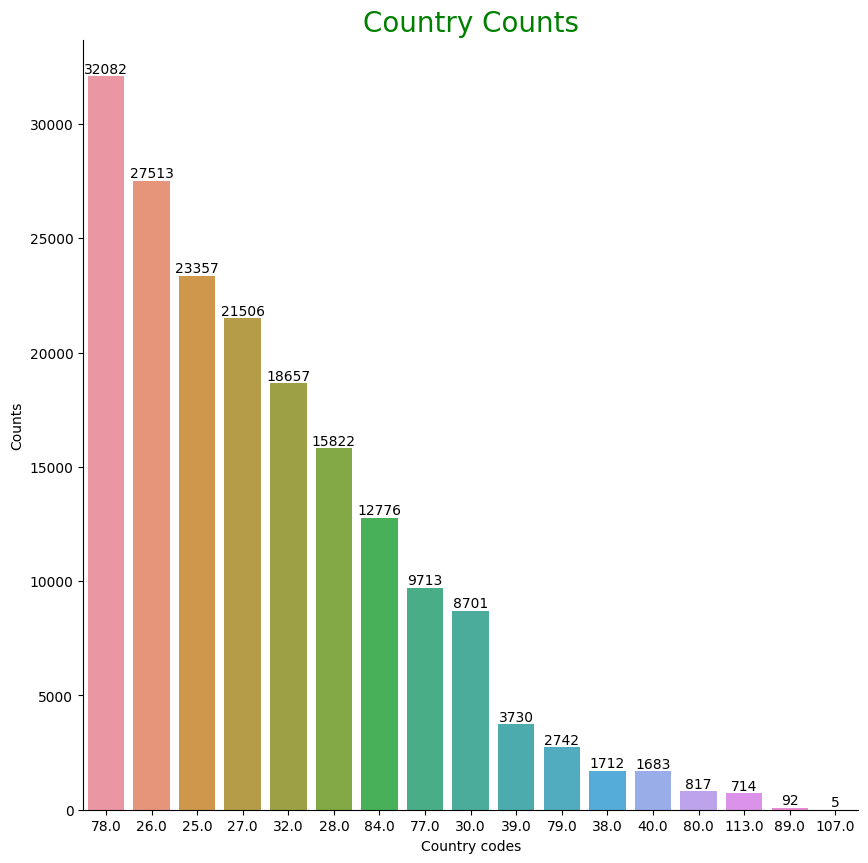

In [38]:
plt.figure(figsize=(10,10))
country=sns.countplot(x='country',data=copper,order=copper['country'].value_counts(ascending=False).index)
country.bar_label(country.containers[0],fontsize=10)

plt.title('Country Counts',fontsize=20,color='green')
plt.xlabel('Country codes',fontsize=10)
plt.ylabel('Counts',fontsize=10)
sns.despine()

In [39]:
copper['product_ref'].nunique()

33

In [40]:
copper['product_ref'].value_counts()

611993        45719
164141591     28778
640665        27373
1670798778    18913
628377        18572
1668701718    15282
640405         9692
1671863738     5161
1332077137     4559
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      256
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

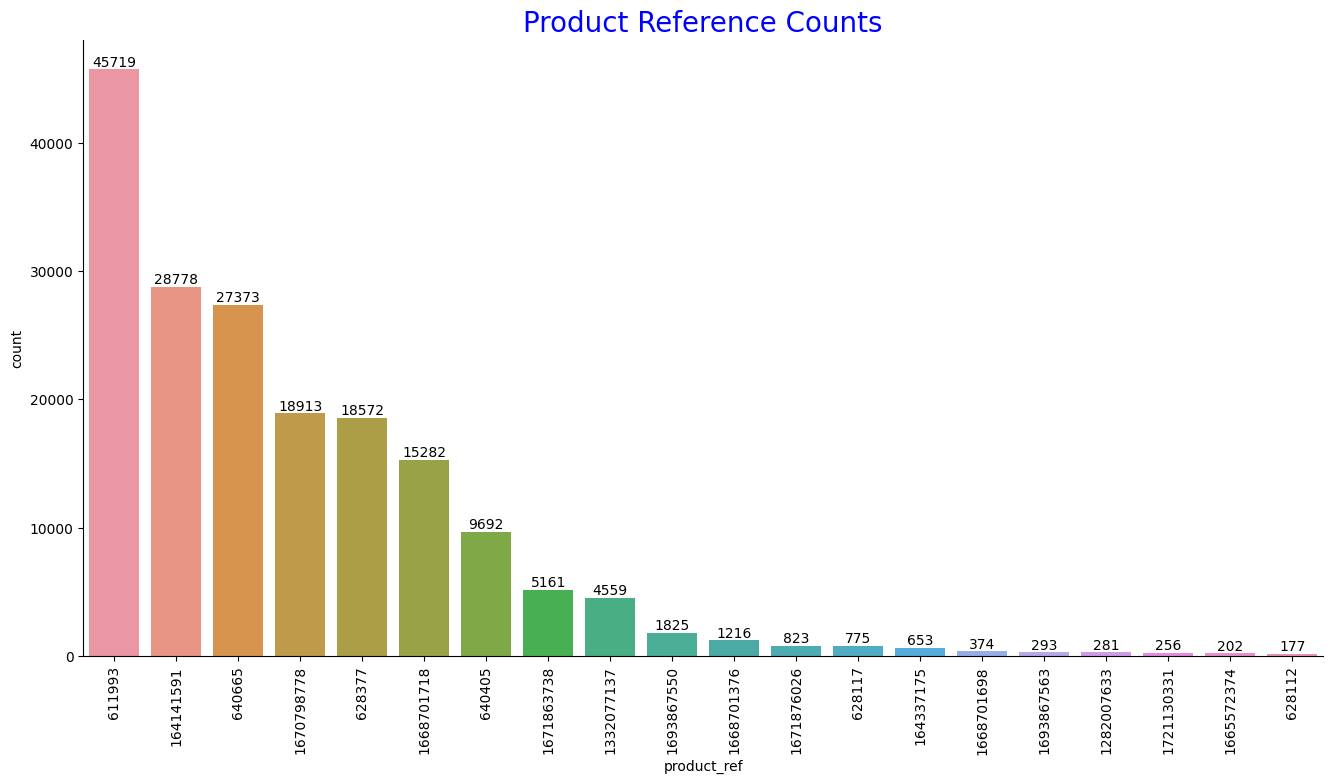

In [41]:
plt.figure(figsize=(16,8))
prodref=sns.countplot(x='product_ref',data=copper,order=copper['product_ref'].value_counts(ascending=False).index[:20])
prodref.bar_label(prodref.containers[0],size=10)
plt.xticks(rotation=90)
plt.title('Product Reference Counts',fontsize=20,color='blue')
sns.despine()

In [42]:
copper.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0


In [43]:
copper['item_date'].dt.year.value_counts()

2020    110736
2021     70886
Name: item_date, dtype: int64

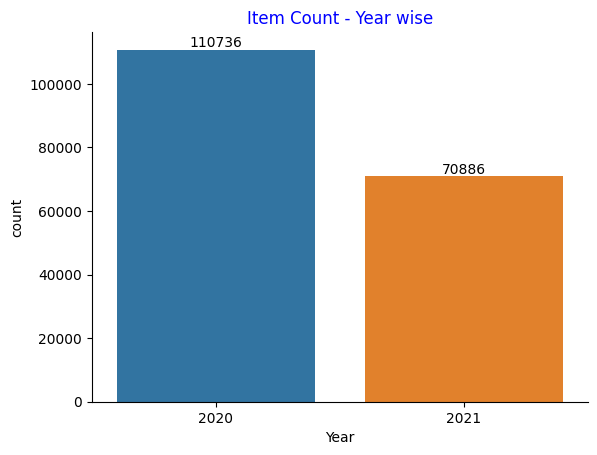

In [44]:
year_item_date=sns.countplot(x=copper['item_date'].dt.year)
year_item_date.bar_label(year_item_date.containers[0])
plt.title('Item Count - Year wise',color='blue')
plt.xlabel('Year')
sns.despine()

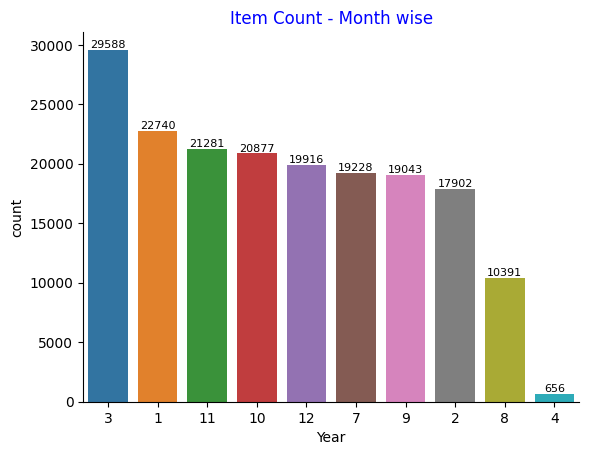

In [45]:
year_item_date=sns.countplot(x=copper['item_date'].dt.month,order=copper['item_date'].dt.month.value_counts(ascending=False).index)
year_item_date.bar_label(year_item_date.containers[0],fontsize=8)
plt.title('Item Count - Month wise',color='blue')
plt.xlabel('Year')
sns.despine()

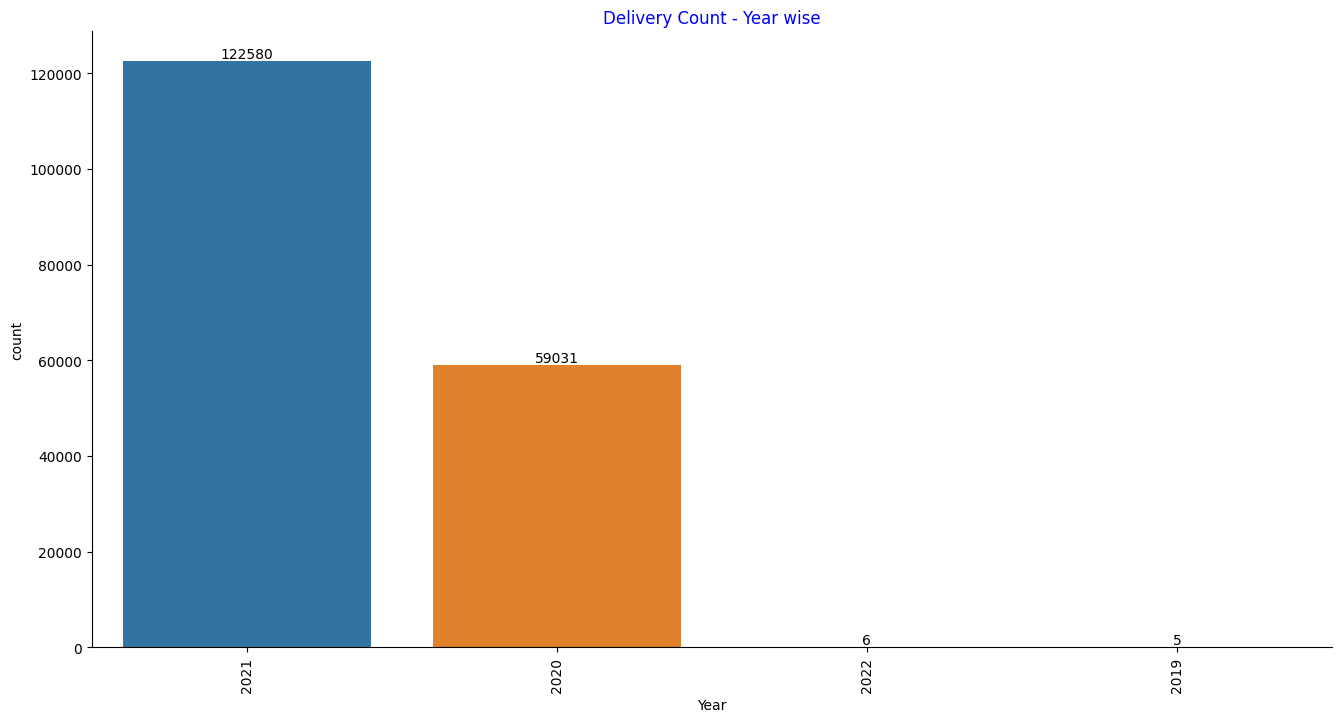

In [46]:
plt.figure(figsize=(16,8))
year_deli_date=sns.countplot(x=copper['delivery date'].dt.year,order=(copper['delivery date'].dt.year).value_counts(ascending=False).index)
year_deli_date.bar_label(year_deli_date.containers[0])
plt.title('Delivery Count - Year wise',color='blue')
plt.xlabel('Year')
plt.xticks(rotation=90)
sns.despine()

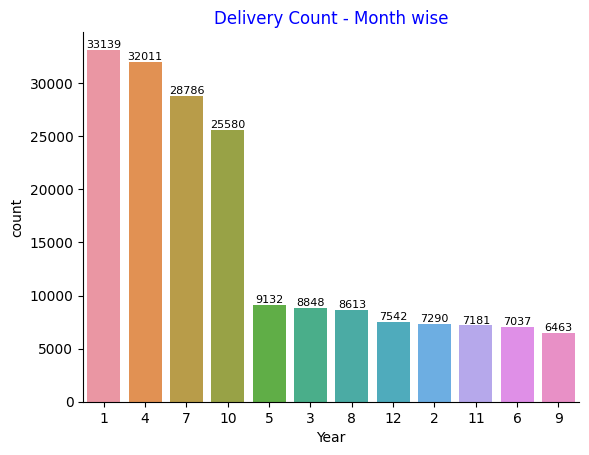

In [47]:
year_deli_date=sns.countplot(x=copper['delivery date'].dt.month,order=copper['delivery date'].dt.month.value_counts(ascending=False).index)
year_deli_date.bar_label(year_deli_date.containers[0],fontsize=8)
plt.title('Delivery Count - Month wise',color='blue')
plt.xlabel('Year')
sns.despine()

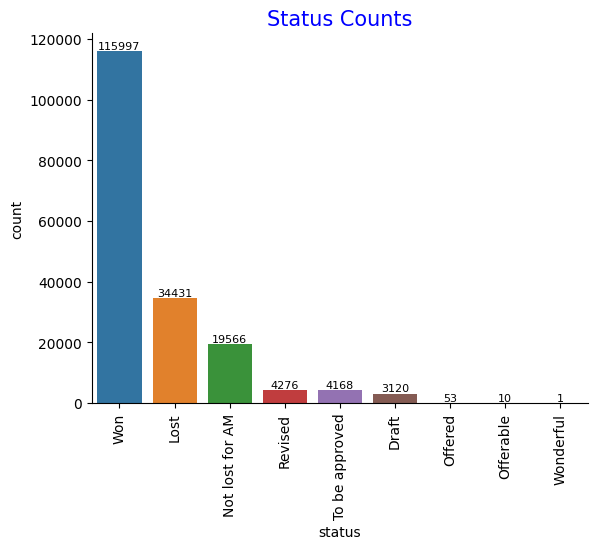

In [48]:
status=sns.countplot(x=copper['status'],order=copper['status'].value_counts(ascending=False).index)
status.bar_label(status.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Status Counts',fontsize=15,color='blue')
sns.despine()

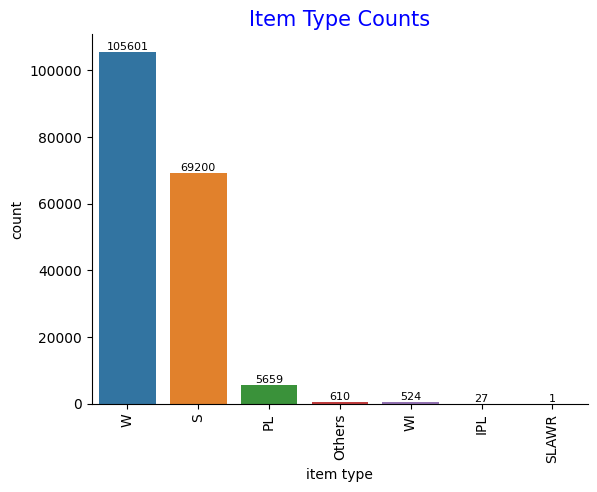

In [49]:
item_type=sns.countplot(x=copper['item type'],order=copper['item type'].value_counts(ascending=False).index)
item_type.bar_label(item_type.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Item Type Counts',fontsize=15,color='blue')
sns.despine()

In [50]:
copper.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [51]:
copper.nunique()

item_date          250
quantity tons    28556
customer          1167
country             17
status               9
item type            7
application         30
thickness          593
width             1386
product_ref         33
delivery date       26
selling_price     9789
dtype: int64

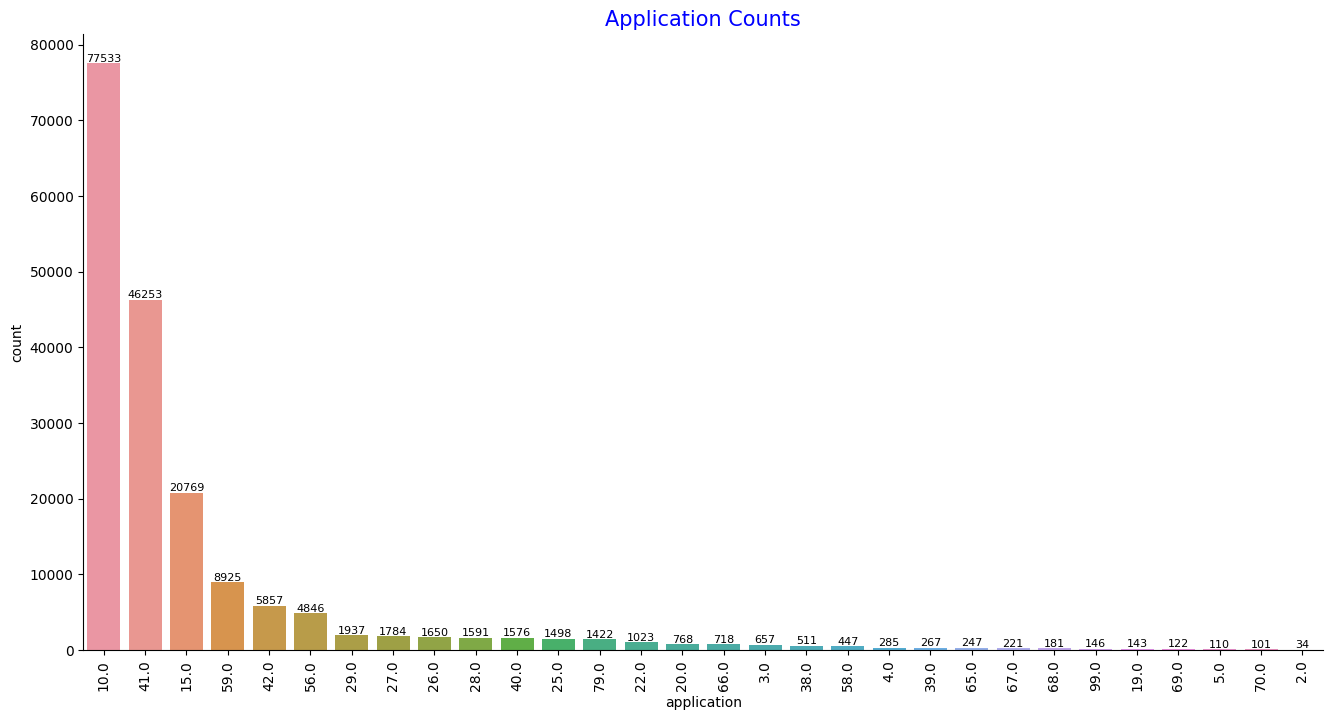

In [52]:
plt.figure(figsize=(16,8))
app=sns.countplot(x=copper['application'],order=copper['application'].value_counts(ascending=False).index)
app.bar_label(app.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Application Counts',fontsize=15,color='blue')
sns.despine()

In [53]:
copper['volume']=copper['thickness']*copper['width']

In [54]:
copper['volume'].nunique()

10371

In [55]:
copper.rename(columns={'volume':'CrSArea'},inplace=True)

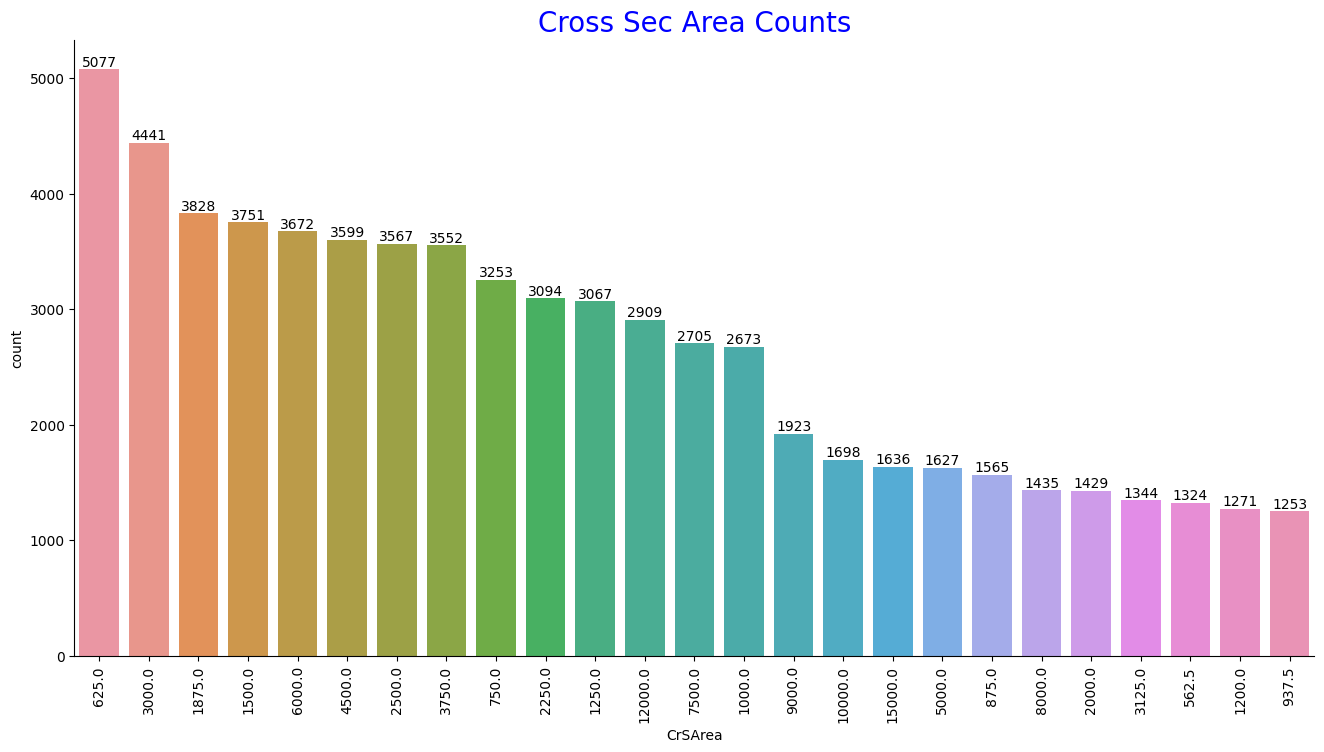

In [56]:
plt.figure(figsize=(16,8))
vol=sns.countplot(x=copper['CrSArea'],order=copper['CrSArea'].value_counts(ascending=False).index[:25])
vol.bar_label(vol.containers[0],fontsize=10)
plt.title('Cross Sec Area Counts',fontsize=20,color='blue')
plt.xticks(rotation=90)
sns.despine()

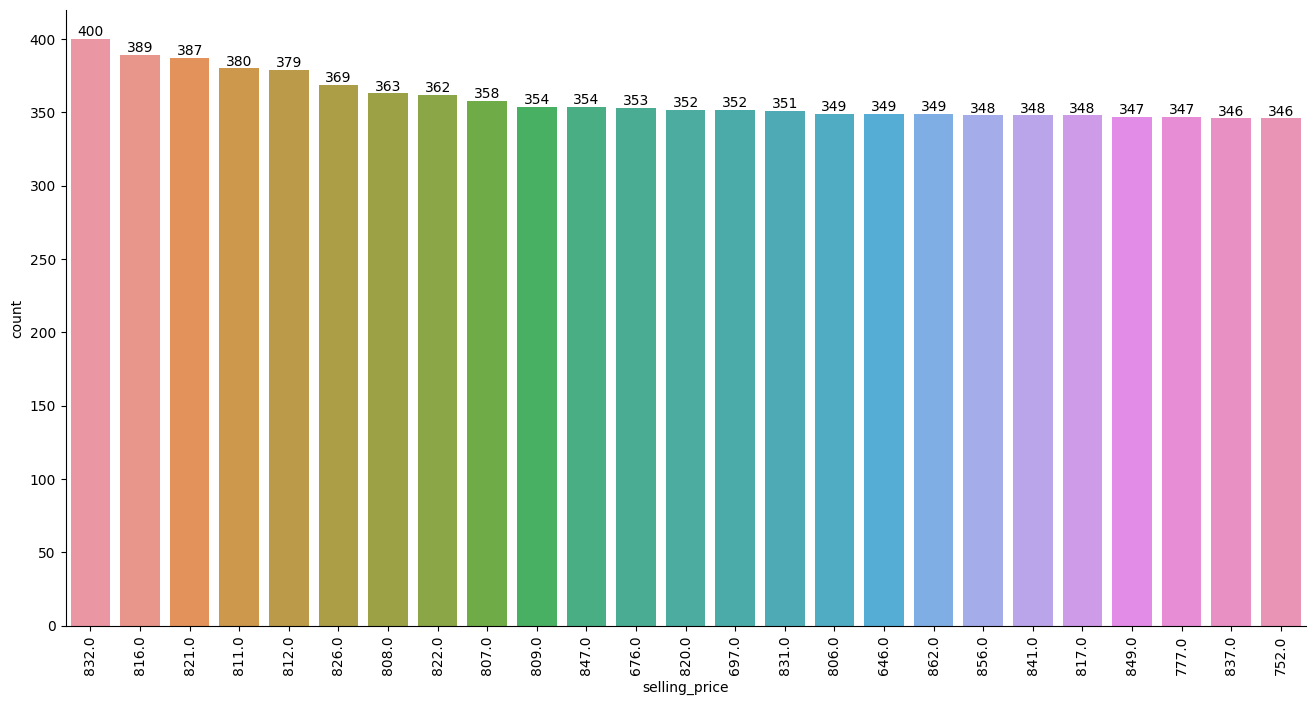

In [57]:
plt.figure(figsize=(16,8))
sp=sns.countplot(x=copper['selling_price'],order=copper['selling_price'].value_counts(ascending=False).index[:25])
sp.bar_label(sp.containers[0],fontsize=10)
plt.xticks(rotation=90)
sns.despine()

In [58]:
copper.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,3000.0
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,968.0


In [59]:
cust_group=copper.groupby(['customer'])['selling_price'].mean().sort_values(ascending =False).to_frame()

In [60]:
#cust_group.rename(columns={'selling_price':'SP'},inplace=True)

In [61]:
cust_group=cust_group.reset_index()

In [62]:
cust_group.describe()

,customer,selling_price
count,1.167000e+03,1.167000e+03
mean,3.024402e+07,1.809170e+04
std,8.890966e+05,5.854613e+05
min,1.245800e+04,1.200000e+01
25%,3.020309e+07,7.282295e+02
50%,3.027138e+07,8.258125e+02
75%,3.034147e+07,9.513048e+02
max,3.040818e+07,2.000071e+07


In [63]:
cust_group['customer']

0       30353306.0
1       30217607.0
2       30147848.0
3       30272666.0
4       30357385.0
           ...    
1162    30276619.0
1163    30398602.0
1164    30348439.0
1165    30218794.0
1166    30350537.0
Name: customer, Length: 1167, dtype: float64

<Axes: xlabel='customer', ylabel='selling_price'>

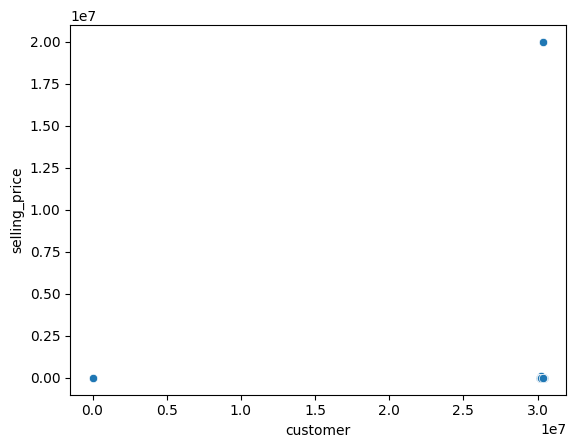

In [64]:
sns.scatterplot(x='customer',y='selling_price',data=cust_group)

In [65]:
copper.groupby(copper['item_date'].dt.year)['selling_price'].sum()

item_date
2020    8.097360e+07
2021    2.674638e+08
Name: selling_price, dtype: float64

In [66]:
copper.groupby(copper['delivery date'])['selling_price'].sum()

delivery date
2019-04-01    1.286380e+03
2019-07-01    2.489810e+03
2019-10-01    9.758100e+02
2020-01-01    8.303647e+04
2020-04-01    4.267502e+04
2020-05-01    8.522000e+03
2020-06-01    1.984000e+04
2020-07-01    5.504583e+06
2020-08-01    2.650572e+06
2020-09-01    3.610141e+06
2020-10-01    1.865056e+07
2020-11-01    4.775331e+06
2020-12-01    5.518043e+06
2021-01-01    1.255131e+08
2021-02-01    5.301030e+06
2021-03-01    7.110566e+06
2021-04-01    2.980980e+07
2021-05-01    1.081726e+08
2021-06-01    6.390519e+06
2021-07-01    2.086574e+07
2021-08-01    3.790153e+06
2021-09-01    3.556643e+05
2021-10-01    2.305640e+05
2021-11-01    2.557000e+03
2021-12-01    2.094200e+04
2022-01-01    6.040000e+03
Name: selling_price, dtype: float64

In [67]:
copper.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

<Axes: xlabel='quantity tons', ylabel='selling_price'>

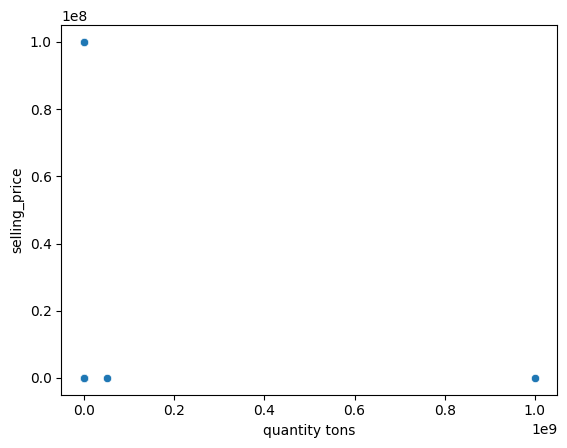

In [68]:
sns.scatterplot(x='quantity tons',y='selling_price',data=copper)

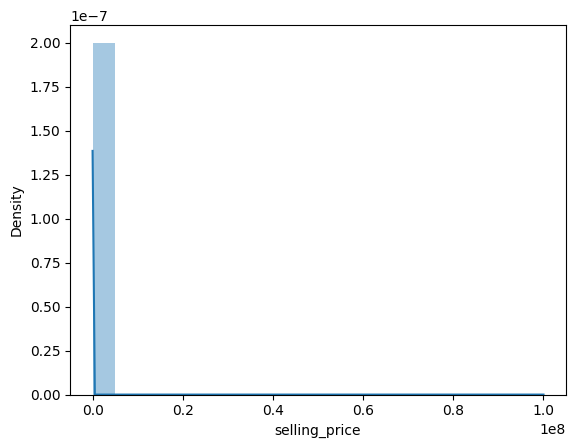

In [69]:
sns.distplot(copper['selling_price'],bins=20,hist=True,kde=True)
plt.show()

In [70]:
cop1=copper.copy()

In [71]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181668,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181669,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181670,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


In [72]:
cop1['selling_price'].skew()

301.3457813386571

In [73]:
spsq=np.sqrt(cop1['selling_price'])
spsq.skew()

292.34275851376947

In [74]:
splog=np.log(cop1['selling_price'])
splog.skew()

-5.342786681271056

In [175]:
from scipy import stats

z = np.abs(stats.zscore(cop1['selling_price']))
cop1 = cop1[(z < 3)]
cop1['selling_price'].skew()

-0.2573017006567768

In [176]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,1.647024,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,8.006368
1,2021-04-01,2.294413,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.875232
2,2021-04-01,2.105434,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.890981
3,2021-04-01,1.942133,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,8.016021
4,2021-04-01,2.300887,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8.987197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,1.792921,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,7.082045
181668,2020-07-02,1.783733,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,7.065784
181669,2020-07-02,1.948863,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,7.261927
181670,2020-07-02,1.197900,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,6.788409


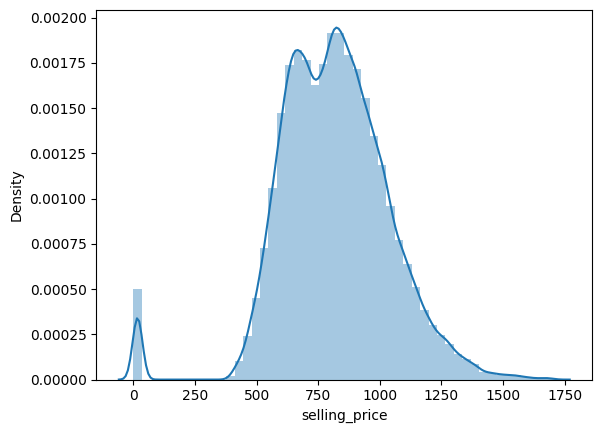

In [177]:
sns.distplot(cop1['selling_price'],bins=None,hist=True,kde=True)
plt.show()

In [252]:
cop1['selling_price'].skew()

-0.2573017006567768

In [253]:
tonssqrt=np.sqrt(cop1['quantity tons'])
tonssqrt.skew()

0.30232784117454464

In [254]:
cop1['quantity tons'].skew()

0.7539325392978908

In [255]:
x = np.abs(stats.zscore(cop1['quantity tons']))
cop1 = cop1[(x < 3)]

In [256]:
cop1['quantity tons'].skew()

0.3564804619748996

In [257]:
qtylog=np.log(cop1['quantity tons'])
qtylog.skew()

-0.24130770369145013

In [258]:
qtysq=np.sqrt(cop1['quantity tons'])
qtysq.skew()

0.0644915121728898

In [259]:
qtycb=np.cbrt(cop1['quantity tons'])
qtycb.skew()

-0.035518452017224006

In [260]:
qty4th=np.power(cop1['quantity tons'],1/4)
qty4th.skew()

-0.08618257199445481

In [262]:
qty5th=np.power(cop1['quantity tons'],1/5)
qty5th.skew()

-0.11681497097264923

In [261]:
qty8th=np.power(cop1['quantity tons'],1/8)
qty8th.skew()

-0.16311646881235348

In [89]:
qty8th

0         1.647024
1         2.294413
2         2.105434
3         1.942133
4         2.300887
            ...   
181667    1.792921
181668    1.783733
181669    1.948863
181670    1.197900
181672    2.119132
Name: quantity tons, Length: 181618, dtype: float64

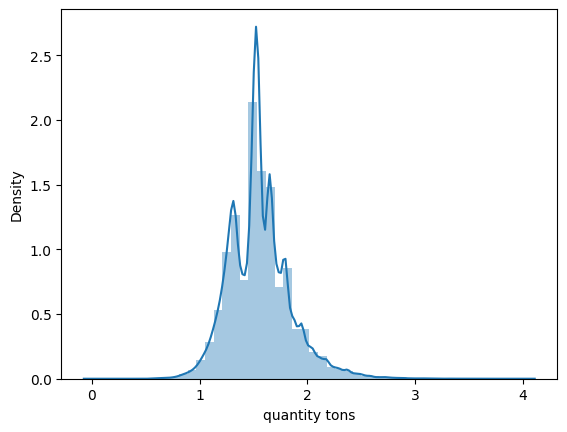

In [90]:
sns.distplot(qty8th,bins=None,hist=True,kde=True)
plt.show()

In [263]:
cop1['quantity tons']=np.sqrt(cop1['quantity tons'])
cop1['quantity tons'].skew()

0.0644915121728898

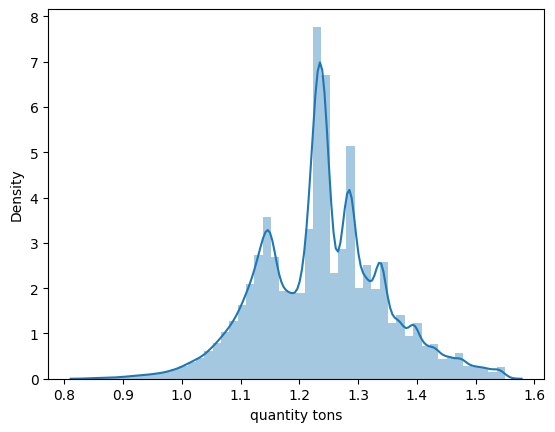

In [264]:
sns.distplot(cop1['quantity tons'],bins=None,hist=True,kde=True)
plt.show()

<Axes: xlabel='selling_price', ylabel='quantity tons'>

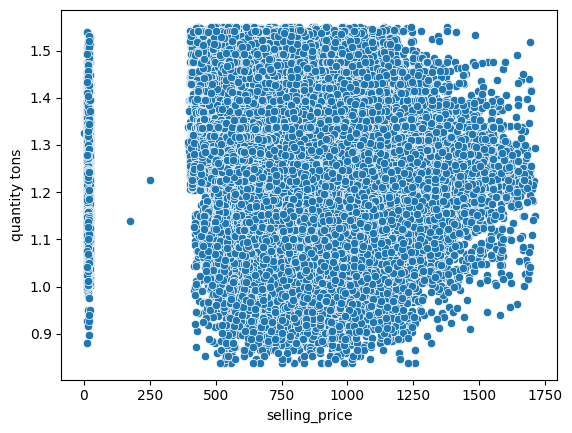

In [265]:
sns.scatterplot(y='quantity tons',x='selling_price',data=cop1)

<Axes: >

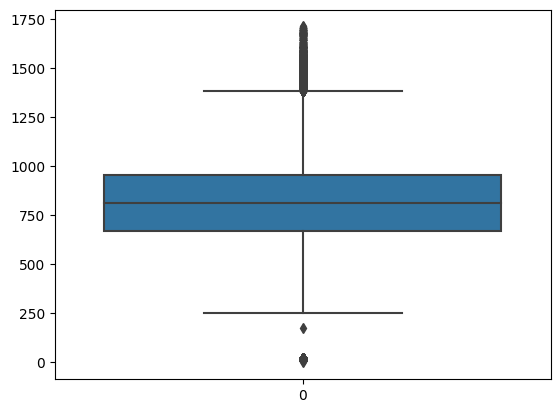

In [267]:
sns.boxplot(cop1['selling_price'])

<Axes: >

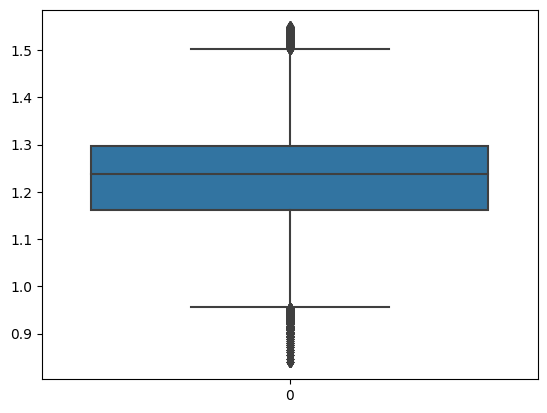

In [266]:
sns.boxplot(cop1['quantity tons'])

<Axes: >

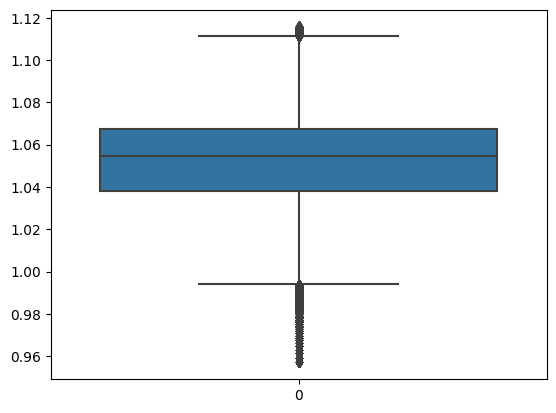

In [268]:
sns.boxplot(qty8th)

In [269]:
cop1.reset_index()

,index,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,0,2021-04-01,1.283364,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,2.080237
1,1,2021-04-01,1.514732,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,1.927925
2,2,2021-04-01,1.451011,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,1.773423
3,3,2021-04-01,1.393604,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,2.081442
4,4,2021-04-01,1.516868,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,2.195801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179505,181667,2020-07-02,1.339000,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1.957563
179506,181668,2020-07-02,1.335565,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1.955264
179507,181669,2020-07-02,1.396017,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1.982645
179508,181670,2020-07-02,1.094486,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.915217


<Axes: xlabel='selling_price', ylabel='CrSArea'>

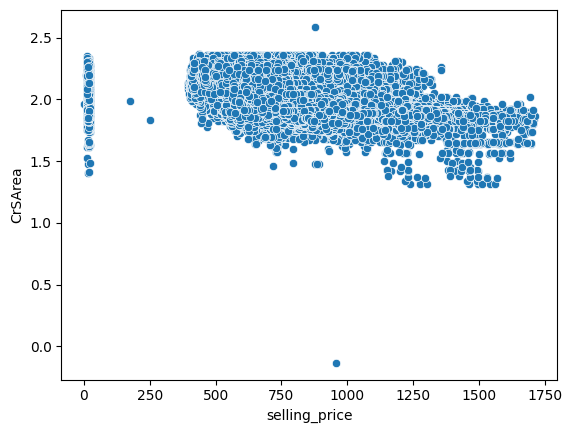

In [270]:
sns.scatterplot(x='selling_price',y='CrSArea',data=cop1)

<Axes: >

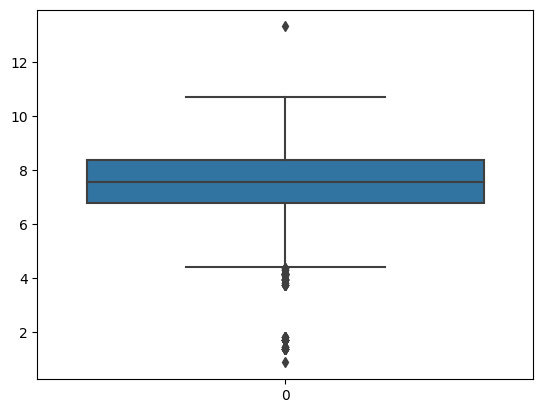

In [99]:
sns.boxplot(np.log(cop1['CrSArea']))

In [184]:
cop1['CrSArea'].skew()

0.1147319283843951

In [183]:
cop1['CrSArea']=np.log(cop1['CrSArea'])
cop1['CrSArea'].skew()

0.1147319283843951

In [102]:
crsasqrt=np.sqrt(cop1['CrSArea'])
crsasqrt.skew()

0.12594561059470086

In [271]:
np.log(cop1.thickness).skew()

0.35228687520121693

In [276]:
np.sqrt(cop1['thickness']).skew()

1.37246388503911

In [277]:
cop1['thickness'].skew()

15.473387015460066

In [278]:
cop1['thickness']=np.log(cop1['thickness'])

In [279]:
cop1['thickness'].skew()

0.35228687520121693

In [280]:
cop1.width.skew()

0.40622212100840766

<Axes: >

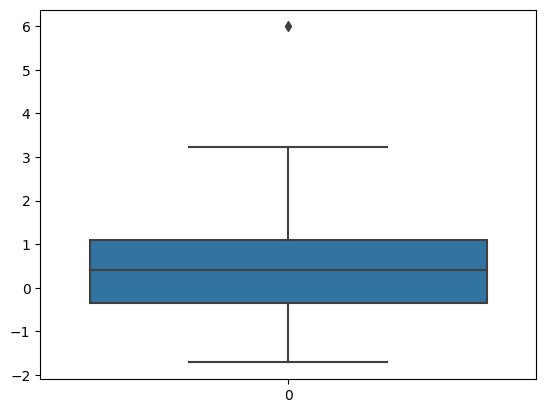

In [281]:
sns.boxplot((cop1['thickness']))


<Axes: >

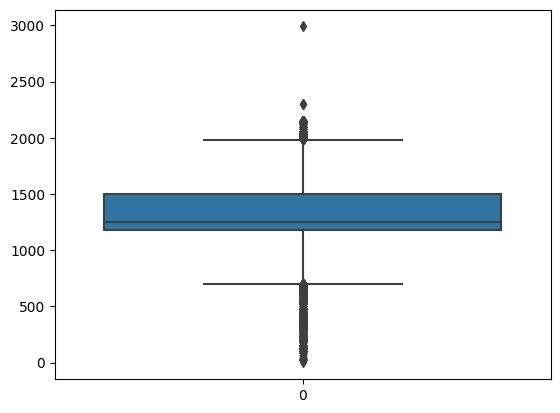

In [106]:
sns.boxplot(cop1['width'])

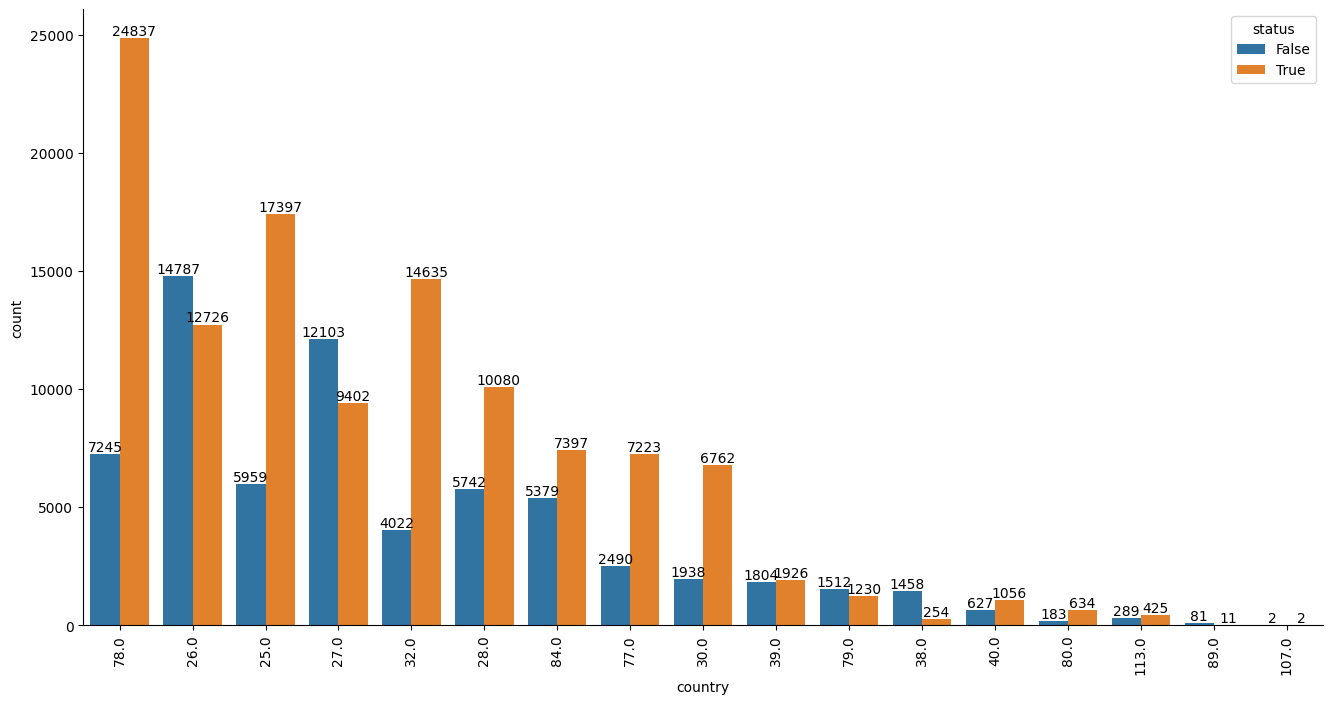

In [107]:
#sns.boxplot(x='rate',y='location',data=df,order=df['location'].value_counts(ascending=False).index[:10])
#sns.boxplot(x='online_order',y='rate',data=df)
plt.figure(figsize=(16,8))
ContStat=sns.countplot(x=cop1['country'],hue=(cop1['status']=='Won'),order=cop1['country'].value_counts(ascending=False).index)
#ContStat.bar_label(ContStat.containers[0])
for cont in ContStat.containers:
    ContStat.bar_label(cont)
plt.xticks(rotation=90)
sns.despine()

In [108]:
cop1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,1.647024,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,8.006368


In [185]:
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [282]:
heatmap=cop1[['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref',
                  'selling_price','CrSArea']].corr()
target=heatmap['selling_price']
target


quantity tons   -0.022697
customer         0.001416
country         -0.025671
application      0.118748
thickness       -0.396000
width           -0.155588
product_ref     -0.070636
selling_price    1.000000
CrSArea         -0.397831
Name: selling_price, dtype: float64

<Axes: >

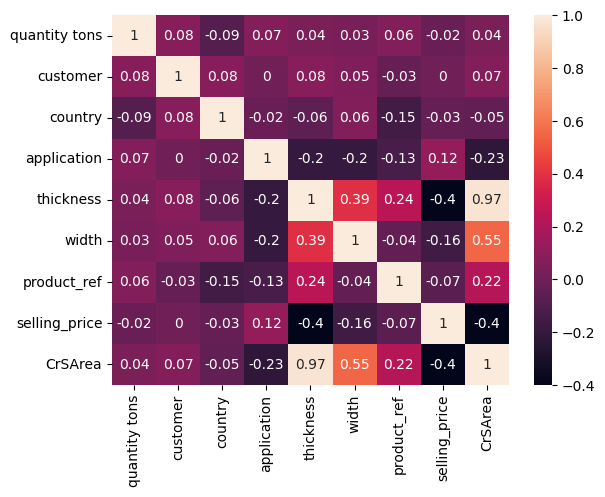

In [283]:
sns.heatmap(heatmap.round(2), annot=True)

# Modeling
## Feature Encoding

In [132]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#from sklearn.model_selection import GridSearchCV

In [188]:
# Feature and target selection
cop1.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,1.647024,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,2.080237
1,2021-04-01,2.294413,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,1.927925


In [114]:
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [284]:
copper2=cop1[['quantity tons','country', 'status',
       'item type', 'application', 'thickness', 'width']]

In [285]:
copper2

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,28.0,Won,W,10.0,0.693147,1500.0
1,1.514732,25.0,Won,W,41.0,-0.223144,1210.0
2,1.451011,30.0,Won,WI,28.0,-0.967584,952.0
3,1.393604,32.0,Won,S,59.0,0.832909,1317.0
4,1.516868,28.0,Won,W,10.0,1.386294,2000.0
...,...,...,...,...,...,...,...
181667,1.339000,25.0,Won,W,41.0,-0.040822,1240.0
181668,1.335565,25.0,Won,W,41.0,-0.040822,1220.0
181669,1.396017,25.0,Won,W,41.0,-0.051293,1500.0
181670,1.094486,25.0,Won,W,41.0,-0.342490,1250.0


In [286]:
# Feature Encoding using One Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(copper2[['status']])
status_ohe = ohe.fit_transform(copper2[['status']]).toarray()

ohe.fit(copper2[['item type']])
item_type_ohe= ohe.fit_transform(copper2[['item type']]).toarray()

In [287]:
status_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [288]:
item_type_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [289]:
# Combining encoded features
X = np.concatenate((copper2[['quantity tons', 'application', 'thickness', 'width','country']].values, status_ohe,item_type_ohe), axis=1)
scaler = StandardScaler()

# X=independent features
X = scaler.fit_transform(X)

#y=Target column
y=cop1['selling_price'].values
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [290]:
# decision tree
dtr = DecisionTreeRegressor(random_state=42)

In [291]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((143608, 21), (35902, 21), (143608,), (35902,))

In [292]:
# Training the model
dtr=dtr.fit(X_train,y_train)

In [293]:
# Model Score with train data
print(dtr.score(X_train,y_train))

0.9984431456936381


In [294]:
# Model Score with test data
print(dtr.score(X_test,y_test))

0.3496617389128426


In [295]:
# selling price prediction
sp_predict=dtr.predict(X_test).round(2)

In [296]:
sp_predict

array([1290.,  467.,  682., ...,  796.,  778.,  661.])

In [297]:
print('R^2 Score:',(r2_score(y_test,sp_predict)*100).round(2))
print('Mean Squared Error (MSE):',(mean_squared_error(y_test,sp_predict)).round(2))
print('Mean Absolute Error (MAE):',(mean_absolute_error(y_test,sp_predict)).round(2))

R^2 Score: 34.97
Mean Squared Error (MSE): 32045.99
Mean Absolute Error (MAE): 128.07


In [298]:
sp_compare=pd.DataFrame({'Actual SP':y_test,'DTR Predicted SP':sp_predict.round(1)})


In [299]:
sp_compare

,Actual SP,DTR Predicted SP
0,1182.0,1290.0
1,557.0,467.0
2,740.0,682.0
3,766.0,928.0
4,660.0,601.0
...,...,...
35897,659.0,585.0
35898,747.0,683.0
35899,794.0,796.0
35900,790.0,778.0


### DTR after tuning hyperparameters

In [300]:
# Grid search CV
# Defining hyperparameters for tuning

parameters={'max_depth': [50,100,200,300],
       'min_samples_split': [20,50,100],
       'min_samples_leaf': [10, 20, 40],
       'max_features': ['auto', 'sqrt', 'log2']}
grid_search=GridSearchCV(dtr,param_grid=parameters,cv=5)

grid_search.fit(X_train,y_train)

print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 50}


In [301]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 21081.189422436488
R-squared: 0.5721804158121283


In [302]:
GR_sp_compare=pd.DataFrame({'Actual SP':y_test,'GS_DTR Predicted SP':y_pred.round(1)})
GR_sp_compare

,Actual SP,GS_DTR Predicted SP
0,1182.0,1091.2
1,557.0,650.5
2,740.0,831.4
3,766.0,875.6
4,660.0,749.6
...,...,...
35897,659.0,734.4
35898,747.0,885.2
35899,794.0,726.7
35900,790.0,669.8


In [303]:
copper2

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,28.0,Won,W,10.0,0.693147,1500.0
1,1.514732,25.0,Won,W,41.0,-0.223144,1210.0
2,1.451011,30.0,Won,WI,28.0,-0.967584,952.0
3,1.393604,32.0,Won,S,59.0,0.832909,1317.0
4,1.516868,28.0,Won,W,10.0,1.386294,2000.0
...,...,...,...,...,...,...,...
181667,1.339000,25.0,Won,W,41.0,-0.040822,1240.0
181668,1.335565,25.0,Won,W,41.0,-0.040822,1220.0
181669,1.396017,25.0,Won,W,41.0,-0.051293,1500.0
181670,1.094486,25.0,Won,W,41.0,-0.342490,1250.0


In [137]:
copper2.country.nunique()

17

In [138]:
copper2.application.nunique()

30

In [304]:
copper2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179510 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  179510 non-null  float64
 1   country        179510 non-null  float64
 2   status         179510 non-null  object 
 3   item type      179510 non-null  object 
 4   application    179510 non-null  float64
 5   thickness      179510 non-null  float64
 6   width          179510 non-null  float64
dtypes: float64(5), object(2)
memory usage: 15.0+ MB


In [305]:
copper2['country']=copper2['country'].astype(str)
copper2['application']=copper2['application'].astype(str)


In [306]:
copper3=copper2.copy()

In [307]:
copper3

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,28.0,Won,W,10.0,0.693147,1500.0
1,1.514732,25.0,Won,W,41.0,-0.223144,1210.0
2,1.451011,30.0,Won,WI,28.0,-0.967584,952.0
3,1.393604,32.0,Won,S,59.0,0.832909,1317.0
4,1.516868,28.0,Won,W,10.0,1.386294,2000.0
...,...,...,...,...,...,...,...
181667,1.339000,25.0,Won,W,41.0,-0.040822,1240.0
181668,1.335565,25.0,Won,W,41.0,-0.040822,1220.0
181669,1.396017,25.0,Won,W,41.0,-0.051293,1500.0
181670,1.094486,25.0,Won,W,41.0,-0.342490,1250.0


In [308]:
copper3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179510 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  179510 non-null  float64
 1   country        179510 non-null  object 
 2   status         179510 non-null  object 
 3   item type      179510 non-null  object 
 4   application    179510 non-null  object 
 5   thickness      179510 non-null  float64
 6   width          179510 non-null  float64
dtypes: float64(3), object(4)
memory usage: 15.0+ MB


In [309]:
df_encoded=pd.get_dummies(copper3,columns=['country','status','item type','application'])

In [310]:
df_encoded

,quantity tons,thickness,width,country_107.0,country_113.0,country_25.0,country_26.0,country_27.0,country_28.0,country_30.0,...,application_58.0,application_59.0,application_65.0,application_66.0,application_67.0,application_68.0,application_69.0,application_70.0,application_79.0,application_99.0
0,1.283364,0.693147,1500.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.514732,-0.223144,1210.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.451011,-0.967584,952.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.393604,0.832909,1317.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.516868,1.386294,2000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,1.339000,-0.040822,1240.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181668,1.335565,-0.040822,1220.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181669,1.396017,-0.051293,1500.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181670,1.094486,-0.342490,1250.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179510 entries, 0 to 181672
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   quantity tons           179510 non-null  float64
 1   thickness               179510 non-null  float64
 2   width                   179510 non-null  float64
 3   country_107.0           179510 non-null  uint8  
 4   country_113.0           179510 non-null  uint8  
 5   country_25.0            179510 non-null  uint8  
 6   country_26.0            179510 non-null  uint8  
 7   country_27.0            179510 non-null  uint8  
 8   country_28.0            179510 non-null  uint8  
 9   country_30.0            179510 non-null  uint8  
 10  country_32.0            179510 non-null  uint8  
 11  country_38.0            179510 non-null  uint8  
 12  country_39.0            179510 non-null  uint8  
 13  country_40.0            179510 non-null  uint8  
 14  country_77.0        

In [312]:
X1=scaler.fit(df_encoded).transform(df_encoded)

In [313]:
X1[1]

array([ 2.62896504e+00, -7.53239402e-01, -3.28054897e-01, -4.72052727e-03,
       -6.30597519e-02,  2.59991820e+00, -4.21115948e-01, -3.66119398e-01,
       -3.09682023e-01, -2.24838743e-01, -3.37198840e-01, -9.78082046e-02,
       -1.45130528e-01, -9.69336846e-02, -2.38286350e-01, -4.62934578e-01,
       -1.24338876e-01, -6.75756286e-02, -2.75784544e-01, -2.26444047e-02,
       -1.32757737e-01, -4.85278196e-01, -3.47012872e-01, -7.46393371e-03,
       -1.71853243e-02, -1.55535359e-01, -1.53551448e-01,  7.53934168e-01,
       -2.36024391e-03, -1.22650754e-02, -5.74732173e-02, -1.69442031e-01,
       -7.85699542e-01, -2.36024391e-03,  8.43200948e-01, -4.99632676e-02,
       -8.63163896e-01, -3.61081744e-01, -2.82355822e-02, -1.37637339e-02,
       -6.52484979e-02, -7.46198924e-02, -8.93261243e-02, -9.58741269e-02,
       -9.96206503e-02, -9.40826600e-02, -1.04114742e-01, -6.05159851e-02,
       -5.32724799e-02, -3.74193618e-02, -3.76426342e-02, -9.39318840e-02,
        1.71038940e+00, -

In [314]:
y1=cop1['selling_price'].values

In [315]:
y1

array([ 854.  , 1047.  ,  644.33, ...,  589.  ,  619.  ,  607.  ])

In [316]:
# test and train split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [317]:
# test and train split
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((143608, 66), (35902, 66), (143608,), (35902,))

In [318]:
# Training the model
dtr1=dtr.fit(X1_train,y1_train)

In [319]:
# Model Score with train data
print(dtr1.score(X1_train,y1_train))

0.9984431456936381


In [320]:
# selling price prediction
sp1_predict=dtr.predict(X1_test).round(2)

In [321]:
sp1_predict

array([851., 734., 749., ..., 796., 778., 679.])

In [322]:
print('R^2 Score:',(r2_score(y1_test,sp1_predict)*100).round(2))
print('Mean Squared Error (MSE):',(mean_squared_error(y1_test,sp1_predict)).round(2))
print('Mean Absolute Error (MAE):',(mean_absolute_error(y1_test,sp1_predict)).round(2))

R^2 Score: 36.1
Mean Squared Error (MSE): 31487.87
Mean Absolute Error (MAE): 126.71


In [323]:
sp1_compare=pd.DataFrame({'Actual SP':y1_test,'DTR Predicted SP':sp1_predict.round(1)})
sp1_compare

,Actual SP,DTR Predicted SP
0,1182.0,851.0
1,557.0,734.0
2,740.0,749.0
3,766.0,656.0
4,660.0,601.0
...,...,...
35897,659.0,585.0
35898,747.0,683.0
35899,794.0,796.0
35900,790.0,778.0


## Extra Tree Regressor

In [324]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=100)
etr.fit(X1_train,y1_train)

ExtraTreesRegressor()

In [325]:
print('ETR Score for Train Data:',etr.score(X1_train,y1_train))
print('ETR Score for Test Data:',etr.score(X1_test,y1_test))


ETR Score for Train Data: 0.998439069183835
ETR Score for Test Data: 0.5598917197326814


## GridSearchCV

In [326]:
# Grid search CV
# Defining hyperparameters for tuning

parameters={'max_depth': [100,200,300,400],
       'min_samples_split': [50,100,150],
       'min_samples_leaf': [10, 20, 30],
       'max_features': ['auto', 'sqrt', 'log2']}
grid_search=GridSearchCV(dtr,param_grid=parameters,cv=5)

grid_search.fit(X1_train,y1_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 50}


In [327]:
best_model = grid_search.best_estimator_
y1_pred = best_model.predict(X1_test)
# evalution metrics
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 21025.624750510724
R-squared: 0.5733080397977806


<Axes: xlabel='selling_price', ylabel='Count'>

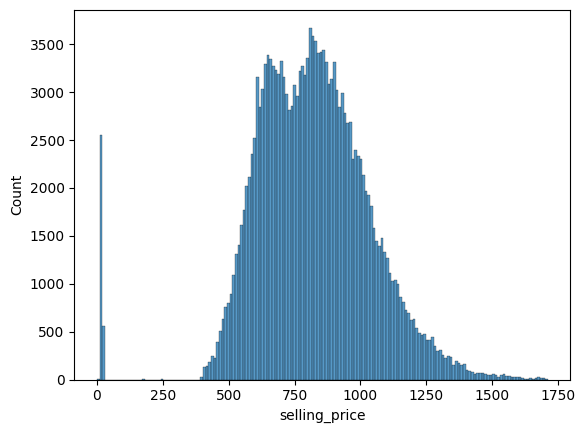

In [328]:
sns.histplot(cop1['selling_price'])

In [329]:
cop1['selling_price'].skew()

-0.2615679693782732

In [248]:
cop1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,1.647024,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,2.080237


In [333]:
copper3['quantity tons'].skew()

0.0644915121728898

In [334]:
copper3['thickness'].skew()

0.35228687520121693

In [332]:
copper3.head()

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,28.0,Won,W,10.0,0.693147,1500.0
1,1.514732,25.0,Won,W,41.0,-0.223144,1210.0
2,1.451011,30.0,Won,WI,28.0,-0.967584,952.0
3,1.393604,32.0,Won,S,59.0,0.832909,1317.0
4,1.516868,28.0,Won,W,10.0,1.386294,2000.0


In [335]:
copper3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179510 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  179510 non-null  float64
 1   country        179510 non-null  object 
 2   status         179510 non-null  object 
 3   item type      179510 non-null  object 
 4   application    179510 non-null  object 
 5   thickness      179510 non-null  float64
 6   width          179510 non-null  float64
dtypes: float64(3), object(4)
memory usage: 15.0+ MB


In [336]:
copper3.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width'],
      dtype='object')

In [337]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [338]:
culabel=['country', 'status', 'item type', 'application']
for i in culabel:
    copper3[i]=le.fit_transform(copper3[i])

In [339]:
copper3.head()

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,5,7,5,0,0.693147,1500.0
1,1.514732,2,7,5,16,-0.223144,1210.0
2,1.451011,6,7,6,9,-0.967584,952.0
3,1.393604,7,7,3,21,0.832909,1317.0
4,1.516868,5,7,5,0,1.386294,2000.0


In [344]:
cu4=copper3.copy()
cu4.reset_index(drop=True)

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,5,7,5,0,0.693147,1500.0
1,1.514732,2,7,5,16,-0.223144,1210.0
2,1.451011,6,7,6,9,-0.967584,952.0
3,1.393604,7,7,3,21,0.832909,1317.0
4,1.516868,5,7,5,0,1.386294,2000.0
...,...,...,...,...,...,...,...
179505,1.339000,2,7,5,16,-0.040822,1240.0
179506,1.335565,2,7,5,16,-0.040822,1220.0
179507,1.396017,2,7,5,16,-0.051293,1500.0
179508,1.094486,2,7,5,16,-0.342490,1250.0


In [363]:
cu4['application'].value_counts().sort_index()

0     76642
1     20705
2       143
3        34
4       761
5       994
6      1421
7      1635
8      1764
9      1575
10     1925
11      655
12      508
13      251
14      254
15     1570
16    45730
17     5705
18      110
19     4779
20      426
21     8777
22      243
23      718
24      218
25      181
26      122
27      101
28     1417
29      146
Name: application, dtype: int64

In [345]:
X2=scaler.fit(cu4).transform(cu4)

In [346]:
X2

array([[ 0.4336822 , -0.47601274,  0.70776628, ..., -0.88970469,
         0.22809525,  0.78190311],
       [ 2.62896504, -1.18271523,  0.70776628, ...,  1.02300916,
        -0.7532394 , -0.3280549 ],
       [ 2.02436729, -0.24044524,  0.70776628, ...,  0.18619685,
        -1.55052482, -1.31553478],
       ...,
       [ 1.50256402, -1.18271523,  0.70776628, ...,  1.02300916,
        -0.56919016,  0.78190311],
       [-1.35844326, -1.18271523,  0.70776628, ...,  1.02300916,
        -0.88105812, -0.17495724],
       [ 2.06907872, -1.18271523,  0.70776628, ...,  1.02300916,
        -0.88105812, -0.21323165]])

In [348]:
cop1['selling_price'].reset_index(drop=True)

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
179505     602.00
179506     591.00
179507     589.00
179508     619.00
179509     607.00
Name: selling_price, Length: 179510, dtype: float64

In [350]:
y2=cop1['selling_price'].values

In [351]:
y2

array([ 854.  , 1047.  ,  644.33, ...,  589.  ,  619.  ,  607.  ])

In [352]:
# test and train split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=50)

# test and train split
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((143608, 7), (35902, 7), (143608,), (35902,))

In [353]:
# Grid search CV
# Defining hyperparameters for tuning

parameters={'max_depth': [100,200,300,400],
       'min_samples_split': [50,100,150],
       'min_samples_leaf': [10, 20, 30],
       'max_features': ['auto', 'sqrt', 'log2']}
grid_search=GridSearchCV(dtr,param_grid=parameters,cv=5)

grid_search.fit(X2_train,y2_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 50}


In [354]:
best_model = grid_search.best_estimator_
y2_pred = best_model.predict(X2_test)
# evalution metrics
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print('Mean squared error:', mse)
print('R-square:', r2)

Mean squared error: 21225.923646604493
R-squared: 0.5754349737907747


In [355]:
sp2_compare=pd.DataFrame({'Actual SP':y2_test,'DTR Predicted SP':y2_pred.round(1)})
sp2_compare

,Actual SP,DTR Predicted SP
0,447.0,781.0
1,976.0,935.8
2,742.0,916.5
3,552.0,745.3
4,964.0,931.0
...,...,...
35897,570.0,784.8
35898,1209.0,968.9
35899,775.0,1048.0
35900,796.0,871.0


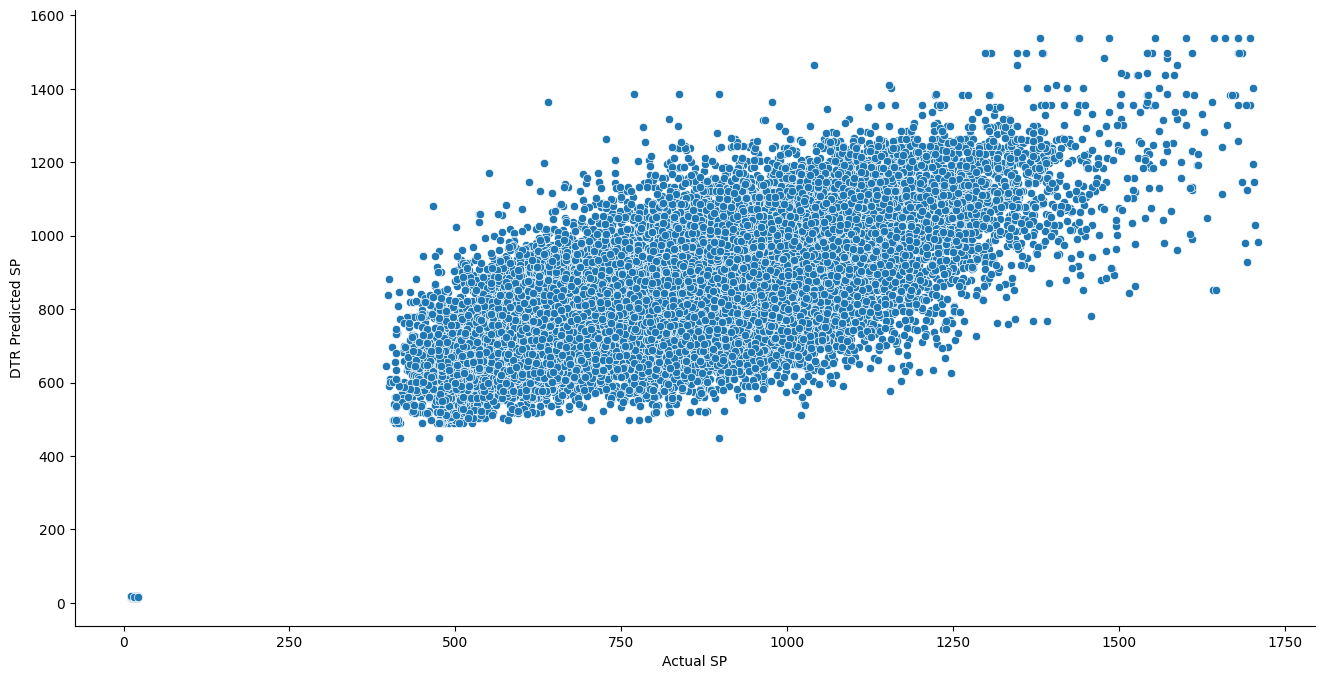

In [358]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=sp2_compare['Actual SP'],y=sp2_compare['DTR Predicted SP'])
sns.despine()

In [364]:
cu4.head(1)

,quantity tons,country,status,item type,application,thickness,width
0,1.283364,5,7,5,0,0.693147,1500.0


In [366]:
best_model.predict([[1.283,5,7,5,0,0.6931,1500]]).round(1)

array([742.8])

In [367]:
import pickle

In [368]:
# Saving the model in pickle
with open('sellprice.pkl','wb') as f:
    pickle.dump(best_model,f)

In [369]:
# Loading the model
sp_load=pickle.load(open('sellprice.pkl','rb'))

In [370]:
sp_load.predict([[1.283,5,7,5,0,0.6931,1500]]).round(1)

array([742.8])

# **Model 2 - Status Prediction - Decision Tree Classifier**

In [373]:
# Filter data only for status = won or lost
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [375]:
cop2=cop1[['quantity tons', 'country', 'status','item type', 'application', 'thickness', 'width','selling_price']]

In [376]:
cop2

,quantity tons,country,status,item type,application,thickness,width,selling_price
0,1.283364,28.0,Won,W,10.0,0.693147,1500.0,854.00
1,1.514732,25.0,Won,W,41.0,-0.223144,1210.0,1047.00
2,1.451011,30.0,Won,WI,28.0,-0.967584,952.0,644.33
3,1.393604,32.0,Won,S,59.0,0.832909,1317.0,768.00
4,1.516868,28.0,Won,W,10.0,1.386294,2000.0,577.00
...,...,...,...,...,...,...,...,...
181667,1.339000,25.0,Won,W,41.0,-0.040822,1240.0,602.00
181668,1.335565,25.0,Won,W,41.0,-0.040822,1220.0,591.00
181669,1.396017,25.0,Won,W,41.0,-0.051293,1500.0,589.00
181670,1.094486,25.0,Won,W,41.0,-0.342490,1250.0,619.00


In [377]:
cop2['status'].nunique()

9

In [379]:
cop3=cop2[cop2['status'].isin(['Won','Lost'])]

In [400]:
cop3.reset_index(drop=True)

,quantity tons,country,status,item type,application,thickness,width,selling_price
0,1.283364,28.0,Won,W,10.0,0.693147,1500.0,854.00
1,1.514732,25.0,Won,W,41.0,-0.223144,1210.0,1047.00
2,1.451011,30.0,Won,WI,28.0,-0.967584,952.0,644.33
3,1.393604,32.0,Won,S,59.0,0.832909,1317.0,768.00
4,1.516868,28.0,Won,W,10.0,1.386294,2000.0,577.00
...,...,...,...,...,...,...,...,...
148664,1.339000,25.0,Won,W,41.0,-0.040822,1240.0,602.00
148665,1.335565,25.0,Won,W,41.0,-0.040822,1220.0,591.00
148666,1.396017,25.0,Won,W,41.0,-0.051293,1500.0,589.00
148667,1.094486,25.0,Won,W,41.0,-0.342490,1250.0,619.00


In [469]:
cop3[cop3['status']=='Lost']


,quantity tons,country,status,item type,application,thickness,width,selling_price
171,1.144939,78.0,Lost,W,10.0,0.000000,1500.0,1253.0
174,1.258409,77.0,Lost,S,10.0,0.000000,1500.0,1225.0
175,1.164596,78.0,Lost,W,10.0,1.386294,1500.0,1186.0
176,1.254563,77.0,Lost,S,10.0,-0.223144,1250.0,1249.0
179,1.156847,78.0,Lost,W,10.0,-0.223144,1500.0,1284.0
...,...,...,...,...,...,...,...,...
181527,1.296662,30.0,Lost,S,10.0,1.766442,1525.0,457.0
181529,1.286105,30.0,Lost,S,10.0,2.060514,1500.0,458.0
181531,1.395230,30.0,Lost,S,10.0,1.348073,1830.0,460.0
181533,1.335979,25.0,Lost,S,10.0,0.336472,1150.0,725.0


In [382]:
cop3.status.nunique()

2

In [390]:
cop3['status'].value_counts()

Won     114453
Lost     34216
Name: status, dtype: int64

In [391]:
cop3[['quantity tons','thickness','width','selling_price']].skew()

quantity tons    0.090186
thickness        0.328791
width            0.365732
selling_price    0.549617
dtype: float64

In [385]:
# importing necessary libraries for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer

In [393]:
# Defining X and Y for modeling
X_Class=cop3[['quantity tons','country','item type','application','thickness','width','selling_price']]
y_class=cop3['status']

In [399]:
X_Class

,quantity tons,country,item type,application,thickness,width,selling_price
0,1.283364,28.0,W,10.0,0.693147,1500.0,854.00
1,1.514732,25.0,W,41.0,-0.223144,1210.0,1047.00
2,1.451011,30.0,WI,28.0,-0.967584,952.0,644.33
3,1.393604,32.0,S,59.0,0.832909,1317.0,768.00
4,1.516868,28.0,W,10.0,1.386294,2000.0,577.00
...,...,...,...,...,...,...,...
181667,1.339000,25.0,W,41.0,-0.040822,1240.0,602.00
181668,1.335565,25.0,W,41.0,-0.040822,1220.0,591.00
181669,1.396017,25.0,W,41.0,-0.051293,1500.0,589.00
181670,1.094486,25.0,W,41.0,-0.342490,1250.0,619.00


In [388]:
y_class

0         Won
1         Won
2         Won
3         Won
4         Won
         ... 
181667    Won
181668    Won
181669    Won
181670    Won
181672    Won
Name: status, Length: 148669, dtype: object

In [402]:
X_Class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148669 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  148669 non-null  float64
 1   country        148669 non-null  float64
 2   item type      148669 non-null  object 
 3   application    148669 non-null  float64
 4   thickness      148669 non-null  float64
 5   width          148669 non-null  float64
 6   selling_price  148669 non-null  float64
dtypes: float64(6), object(1)
memory usage: 9.1+ MB


In [405]:
# Encoding categorical columns
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_Class[['item type']])
X_ohe=ohe.fit_transform(X_Class[['item type']]).toarray()

In [406]:
# Encoding target variable to binary values
lb=LabelBinarizer()
lb.fit(y_class)
Y=lb.fit_transform(y_class)

In [409]:
# Combining all features to array
X_class=np.concatenate((X_Class[['quantity tons','country','application','thickness','width','selling_price']].values,X_ohe),axis=1)

In [411]:
# Standardising the data
scaler=StandardScaler()
X_class=scaler.fit_transform(X_class)

In [413]:
X_class[1]

array([ 2.65301365e+00, -8.33870560e-01,  8.96882528e-01, -7.81378902e-01,
       -3.30942031e-01,  1.12718119e+00, -1.34775550e-02, -5.47924526e-02,
       -1.74863262e-01, -7.33559121e-01, -2.59352985e-03,  7.92172366e-01,
       -5.36695934e-02])

In [453]:
X_train,X_test,y_train,y_test=train_test_split(X_class,Y1D,test_size=0.2,random_state=100)

In [454]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((118935, 13), (29734, 13), (118935,), (29734,))

In [455]:
# Decision Tree Classifer
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [461]:
# Prediction
y_predict=dtc.predict(X_test)

In [465]:
status_compare=pd.DataFrame({'Actual status':y_test,'DTC Predicted Status':y_predict})
status_compare

,Actual status,DTC Predicted Status
0,1,1
1,0,1
2,1,1
3,0,0
4,1,0
...,...,...
29729,1,1
29730,1,1
29731,1,1
29732,0,0


## Evaluation Metrics

In [458]:
# Accuracy
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8598910338333221

In [459]:
# Confusion Matrix
CM=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n',CM)

Confusion Matrix:
 [[ 4814  2073]
 [ 2093 20754]]


<Axes: >

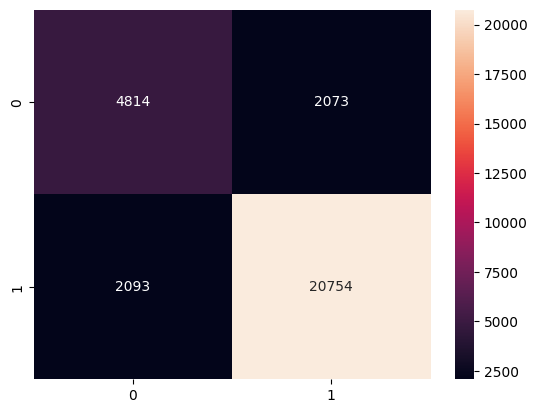

In [460]:
sns.heatmap(CM,annot=True,fmt='g')

In [438]:
# Classification Report
from sklearn.metrics import classification_report, roc_curve, auc
cr=classification_report(y_test, y_predict,output_dict=True)
crp=pd.DataFrame(cr).transpose()
crp

,precision,recall,f1-score,support
0,0.690348,0.693072,0.691707,6842.00000
1,0.908157,0.907085,0.907621,22892.00000
accuracy,0.857840,0.857840,0.857840,0.85784
macro avg,0.799252,0.800079,0.799664,29734.00000
weighted avg,0.858037,0.857840,0.857938,29734.00000


In [471]:
# Predicting Status for given inputs
#['quantity tons','country','application','thickness','width','selling_price','item type']
new_sample = np.array([[1.1449, 78, 10,0, 1500, 1253,'W']])

new_sample_ohe = ohe.transform(new_sample[:, [6]]).toarray()
new_sample = np.concatenate((new_sample[:,[0,1,2,3,4,5]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
print(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')


[[-0.86742221  1.32862239 -0.86062488 -0.54198125  0.75819009  2.17361225
  -0.01347755 -0.05479245 -0.17486326 -0.73355912 -0.00259353  0.79217237
  -0.05366959]]
The status is: Lost


In [475]:
cop3[cop3['status']=='Lost'][:5]


,quantity tons,country,status,item type,application,thickness,width,selling_price
171,1.144939,78.0,Lost,W,10.0,0.000000,1500.0,1253.0
174,1.258409,77.0,Lost,S,10.0,0.000000,1500.0,1225.0
175,1.164596,78.0,Lost,W,10.0,1.386294,1500.0,1186.0
176,1.254563,77.0,Lost,S,10.0,-0.223144,1250.0,1249.0
179,1.156847,78.0,Lost,W,10.0,-0.223144,1500.0,1284.0


In [472]:
# Saving the Model in pickle
with open('classmodel.pkl','wb') as f:
    pickle.dump(dtc,f)

In [473]:
# Loading the model
class_load=pickle.load(open('classmodel.pkl','rb'))

In [479]:
# Predicting Status for given inputs by loading pickle
#['quantity tons','country','application','thickness','width','selling_price','item type']
new_sample = np.array([[1.258, 77, 10,1.386294, 1200, 1286,'W']])

new_sample_ohe = ohe.transform(new_sample[:, [6]]).toarray()
new_sample = np.concatenate((new_sample[:,[0,1,2,3,4,5]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = class_load.predict(new_sample)
print(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

[[ 0.20917841  1.28782064 -0.86062488  0.9452924  -0.36849831  2.34124441
  -0.01347755 -0.05479245 -0.17486326 -0.73355912 -0.00259353  0.79217237
  -0.05366959]]
The status is: Lost
